In [130]:
#Load the library
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize
import string
from functools import reduce
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import digits



In [80]:
#Load a ticket data
df = pd.read_excel('Tickets.xlsx')
df.head()

,Problem Description
0,"WE NEED NEW DATE FOR ""ORDER DUE DATE"" & ""INST..."
1,EQUIPMENT FLOWED TO RXMO (PND -ORDER EQUIPMEN...
2,TEAM WE NEED RCA TO DETERMINE HOW DID THIS OR...
3,NO EQUIPMENT ORDER AND NO DISPATCH REQUEST GE...
4,RXMO DID NOT FLOW EQUIPMENT REQUEST TO ORACLE...


In [194]:
#Tokenization,Clean text from stopword,Lemmatization
lem = WordNetLemmatizer()
stop_words=stopwords.words("english")
splitwords = [[lem.lemmatize(word.translate({ord(k): None for k in digits}).translate({ord(k): None for k in string.punctuation})) for word in nltk.word_tokenize(str(ticket.lower())) if word not in stop_words] for ticket in df['Problem Description']]
flat_list = [item for sublist in splitwords for item in sublist]
fdist = FreqDist(flat_list)
vocab={}
j=0
for i in list(fdist.keys()):
    vocab[i] = j
    j=j+1



{'need': 0, 'new': 1, 'date': 2, '': 3, 'order': 4, 'due': 5, 'install': 6, 'start': 7, 'time': 8, 'equipment': 9, 'flowed': 10, 'rxmo': 11, 'pnd': 12, 'never': 13, 'group': 14, 'omnioracle': 15, 'team': 16, 'rca': 17, 'determine': 18, 'progress': 19, 'complete': 20, 'ttu': 21, 'didnt': 22, 'actually': 23, 'last': 24, 'week': 25, 'please': 26, 'chat': 27, 'room': 28, 'open': 29, 'issue': 30, 'high': 31, 'priority': 32, 'dispatch': 33, 'request': 34, 'generated': 35, 'flow': 36, 'oracle': 37, 'shipping': 38, 'tn': 39, 'spp': 40, 'doesnt': 41, 'stuck': 42, 'activate': 43, 'bvoip': 44, 'porting': 45, 'assist': 46, 'number': 47, 'pending': 48, 'add': 49, 'status': 50, 'webachment': 51, 'none': 52, 'supp': 53, 'nt': 54, 'added': 55, 'initial': 56, 'however': 57, 'submit': 58, 'rxco': 59, 'error': 60, 'service': 61, 'address': 62, 'invalid': 63, 'exclamation': 64, 'mark': 65, 'directory': 66, 'listing': 67, 'tab': 68, 'indicates': 69, 'problem': 70, 'still': 71, 'unidentified': 72, 'sev': 73

1198


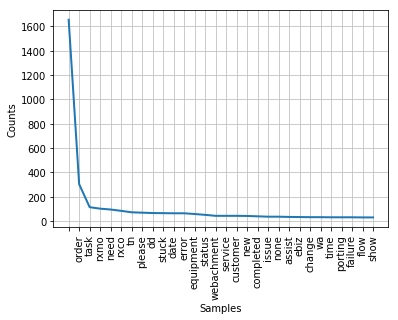

In [175]:
# Frequency Distribution Plot
fdist.plot(30)
plt.show()